In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os

import plotly.express as px

%matplotlib inline

In [2]:
import matplotlib.style as style

style.use("fivethirtyeight")
style.use('seaborn-poster')

plt.rcParams['font.family'] = 'sans-serif'

# DATA PREPARATION

In [3]:
customer = pd.read_csv('marketing_campaign.csv', sep='\t')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
customer.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
customer.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [6]:
#MISSING VALUES
missing_values = customer.isna().sum().to_dict()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

fig = px.bar(missing_values_df, x='Column', y='Missing_Values', title = 'Missing Values')
fig.show()

In [7]:
customer = customer.dropna()

In [8]:
#FEATURE ENGINEERING    

In [9]:
#AGE OF CUSTOMERS
import datetime as dt
customer['Age'] = 2015 - customer.Year_Birth
customer['Age'].head()

0    58
1    61
2    50
3    31
4    34
Name: Age, dtype: int64

In [10]:
#MONTH SINCE ENROLLMENT 
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
customer['Month_customer'] = 12.0 * (2015 - customer['Dt_Customer'].dt.year) + (1 - customer['Dt_Customer'].dt.month)
customer['Month_customer']

0       33.0
1        5.0
2       17.0
3        3.0
4       12.0
        ... 
2235    19.0
2236     3.0
2237    12.0
2238    12.0
2239    27.0
Name: Month_customer, Length: 2216, dtype: float64

In [11]:
#TOTAL SPENDINGS
customer['TotalSpendings'] = customer.MntWines + customer.MntFruits + customer.MntMeatProducts + customer.MntFishProducts + customer.MntSweetProducts + customer.MntGoldProds
customer['TotalSpendings']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: TotalSpendings, Length: 2216, dtype: int64

In [12]:
#AGE GROUPS
customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 20) & (customer['Age'] <= 39), 'AgeGroup'] = 'Adult'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 60), 'AgeGroup'] = 'Senior Adult'

In [13]:
#NUMBER OF CHILDREN
customer['Children'] = customer['Kidhome'] + customer['Teenhome']

In [14]:
#MARITAL STATUS - PARTNER and SINGLE
customer['Marital_Status'] = customer['Marital_Status'].replace({ 'Together' : 'Partner', 'Married': 'Partner', 
                                                                 'Divorced': 'Single', 'Widow': 'Single', 'Alone': 'Single',
                                                                 'YOLO': 'Single', 'Absurd': 'Single' })

customer['Marital_Status'].value_counts()

Partner    1430
Single      786
Name: Marital_Status, dtype: int64

# REMOVING OUTLIERS 

Text(0, 0.5, 'Income')

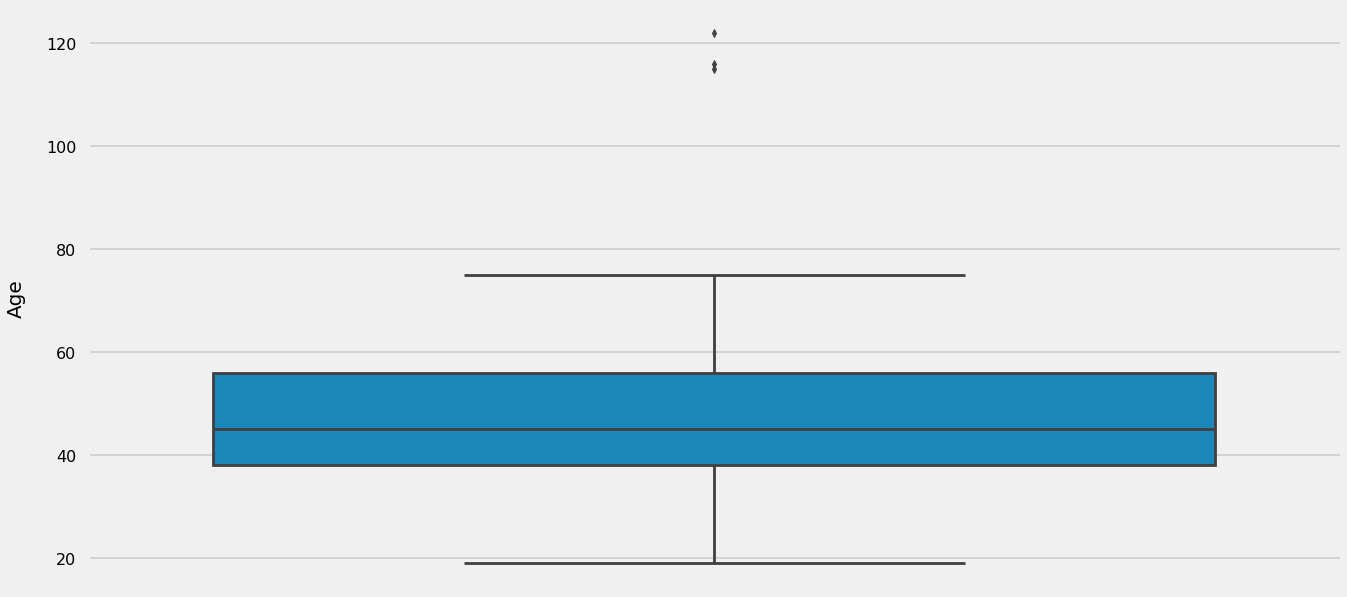

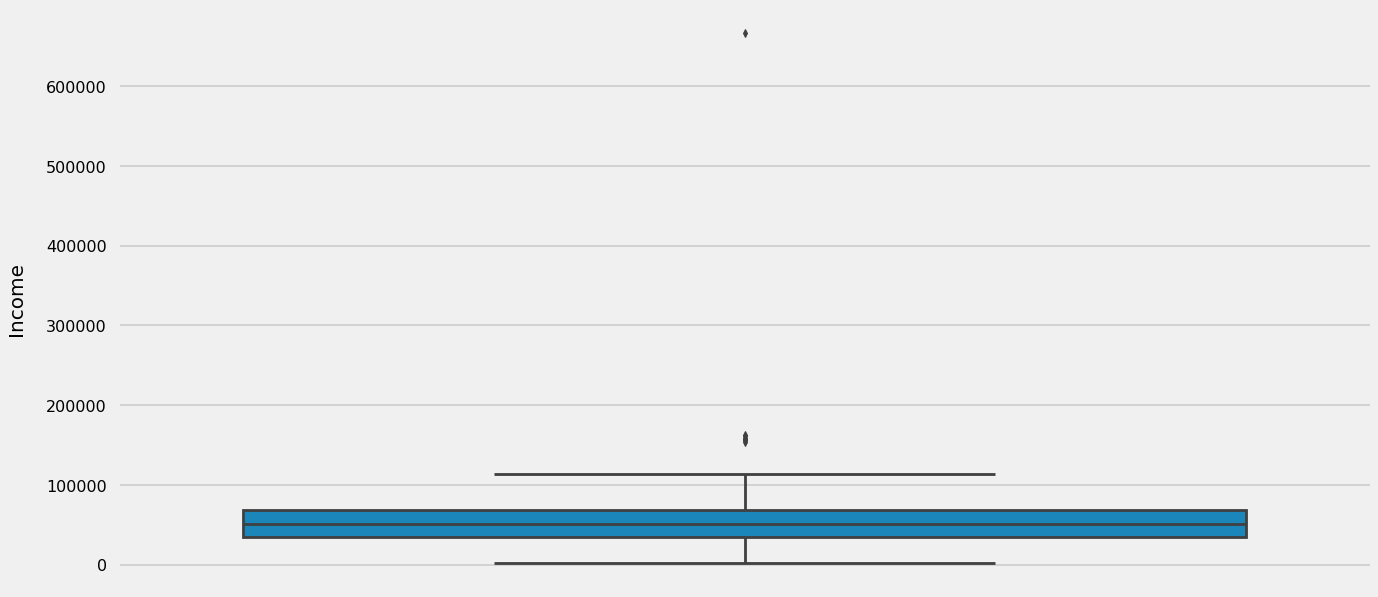

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(y = customer['Age'])
plt.ylabel('Age', fontsize=20, labelpad=20)

plt.figure(figsize=(20,10))
sns.boxplot(y = customer['Income'])
plt.ylabel('Income', fontsize=20, labelpad=20)

In [16]:
customer = customer[customer['Age'] < 100]
customer = customer[customer['Income'] < 120000]

# EXPLORATORY DATA ANALYSIS 

In [17]:
maritalstatus = customer['Marital_Status'].value_counts()

fig = px.pie(maritalstatus, values= maritalstatus.values, names= maritalstatus.index, 
             color_discrete_sequence= px.colors.sequential.RdBu)
fig.update_traces(textposition= 'inside', textinfo= 'percent+label', marker = dict(line = dict(color = 'white', width=2)))
fig.show()

In [18]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Month_customer', 'TotalSpendings', 'AgeGroup', 'Children'],
      dtype='object')

Text(0, 0.5, 'Marital Status')

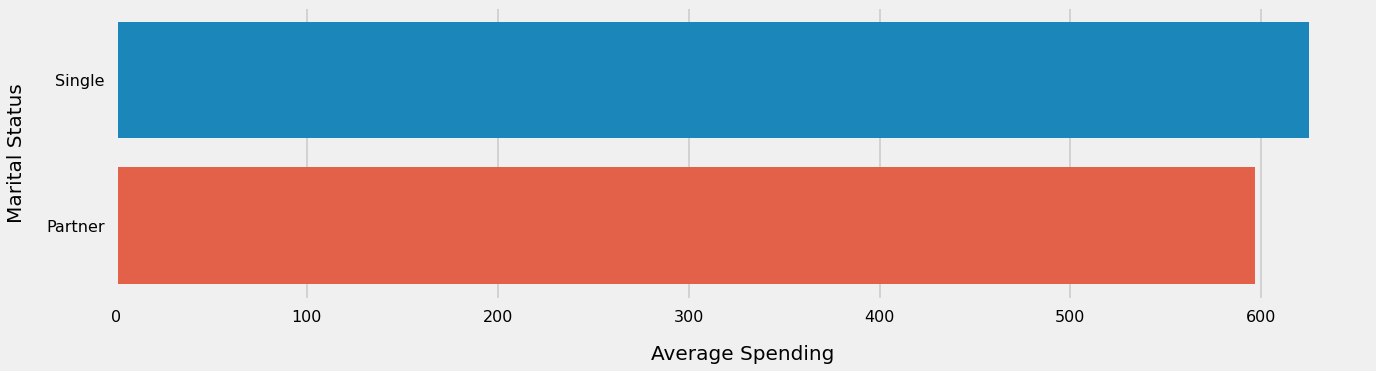

In [19]:
#AVERAGE SPENDINGS: MARITAL STATUS WISE
maritalspending = customer.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])


plt.figure(figsize=(20,5))
sns.barplot(data = maritalspending_df, x='Average Spending', y='Marital Status');

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel( 'Average Spending', fontsize=20, labelpad=20)
plt.ylabel( 'Marital Status', fontsize=20, labelpad=20)

In [20]:
#EDUCATIONAL LEVEL
education = customer.Education.value_counts()

fig = px.pie(education, values= education.values, names= education.index, 
             color_discrete_sequence= px.colors.sequential.RdBu)
fig.update_traces(textposition= 'inside', textinfo= 'percent+label', marker = dict(line = dict(color = 'white', width=2)))
fig.show()

In [21]:
#CHILD STATUS
children = customer.Children.value_counts()

fig = px.pie(children, values= children.values, names= children.index, 
             color_discrete_sequence= px.colors.sequential.RdBu)
fig.update_traces(textposition= 'inside', textinfo= 'percent+label', marker = dict(line = dict(color = 'white', width=2)))
fig.show()

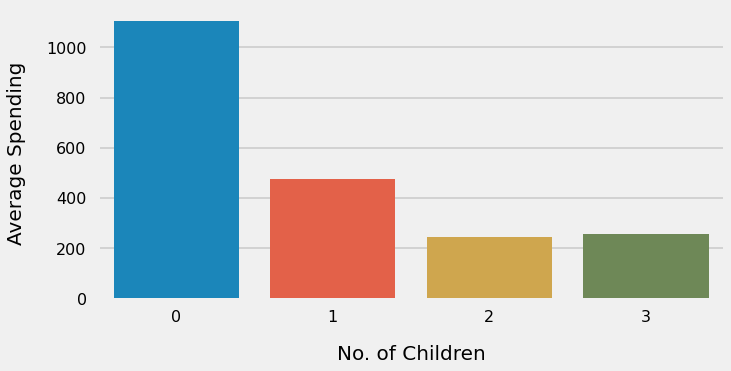

In [22]:
#AVERAGE SPENDINGS: CHILD STATUS WISE
childrenspending = customer.groupby('Children')['TotalSpendings'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(10,5))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Children', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

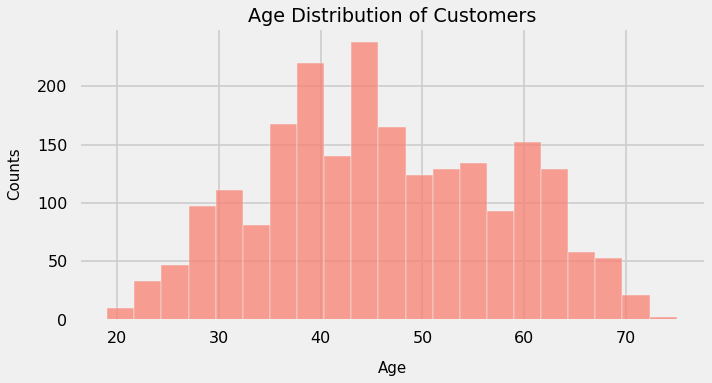

In [23]:
#AGE DISTRIBUTION OF CUSTOMERS
plt.figure(figsize=(10,5))
ax= sns.histplot(data= customer.Age, color= 'salmon')
ax.set(title = 'Age Distribution of Customers');

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=15, labelpad=15)
plt.ylabel('Counts', fontsize=15, labelpad=15);

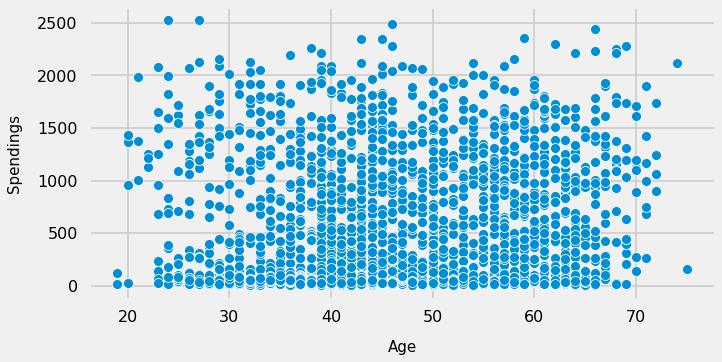

In [24]:
#RELATIONSHIP: AGE X SPENDING
plt.figure(figsize=(10,5))
sns.scatterplot(x=customer.Age, y= customer.TotalSpendings, s=100)

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=15, labelpad=15)
plt.ylabel('Spendings', fontsize=15, labelpad=15);

In [25]:
#CUSTOMERS SEGMENTATION: AGE GROUP WISE
agegroup = customer.AgeGroup.value_counts()

fig = px.pie(labels = agegroup.index, values= agegroup.values, names= agegroup.index, width= 550, height= 550)
fig.update_traces(textposition= 'inside', textinfo= 'percent+label', hole=0.75, 
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'],
                               line= dict(color = 'white', width = 2)))
fig.update_layout(annotations = [dict(text = 'AgeGroups', x = 0.5, y=0.5, font_size=36, showarrow= False, font_color = 'Black')],
                 showlegend = False)

fig.show()

Text(0, 0.5, 'Age Group')

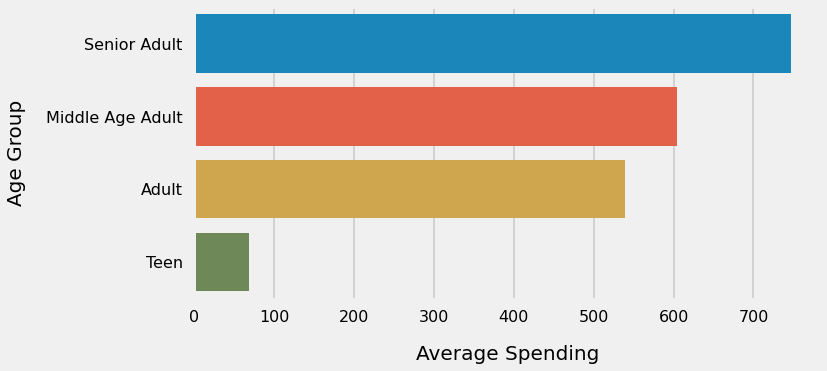

In [26]:
#AVERAGE SPENDINGS: AGE GROUP WISE
agegroupspending = customer.groupby('AgeGroup')['TotalSpendings'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroupspending.items()), columns=['Age Group', 'Average Spending'])

plt.figure(figsize=(10,5))
sns.barplot(data = agegroupspending_df, x='Average Spending', y='Age Group');

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Age Group', fontsize=20, labelpad=20)

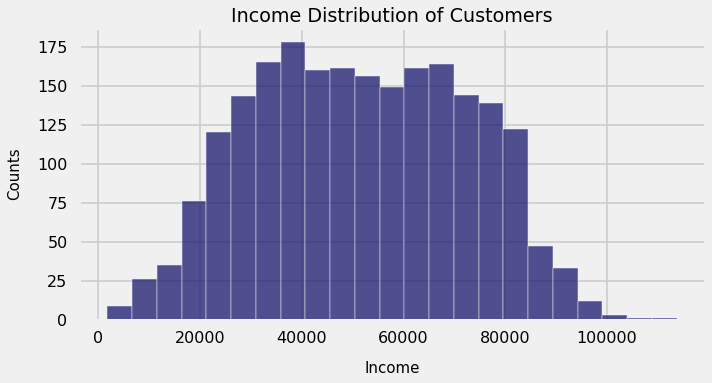

In [27]:
#INCOME DISTRIBUTION OF CUSTOMERS
plt.figure(figsize=(10,5))
ax= sns.histplot(data= customer.Income, color = 'midnightblue')
ax.set(title = 'Income Distribution of Customers');

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=15, labelpad=15)
plt.ylabel('Counts', fontsize=15, labelpad=15);

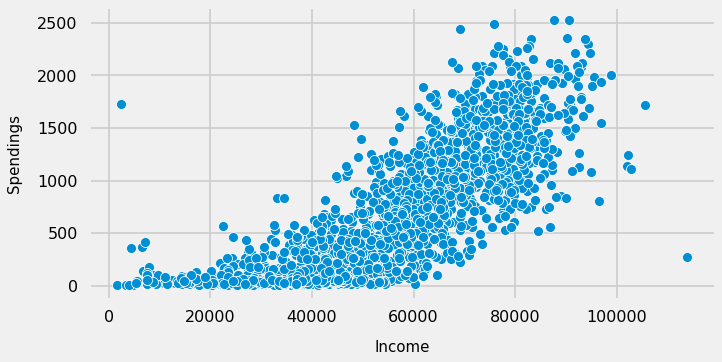

In [28]:
#INCOME x SPENDINGS
plt.figure(figsize=(10,5))
sns.scatterplot(x=customer.Income, y= customer.TotalSpendings, s=100)

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=15, labelpad=15)
plt.ylabel('Spendings', fontsize=15, labelpad=15);

Text(0, 0.5, 'Age Group')

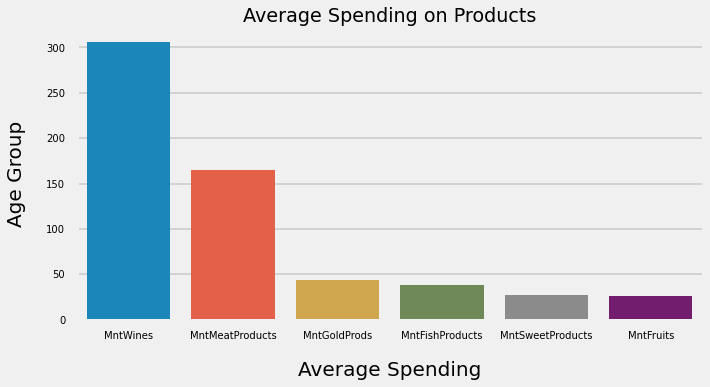

In [29]:
#MOST BOUGHT PRODUCTS
products = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

products_mean = products.mean(axis=0).sort_values(ascending=False)
products_mean_df = pd.DataFrame(list(products_mean.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(10,5))
plt.title('Average Spending on Products')
sns.barplot(data = products_mean_df, x='Product' , y='Average Spending');
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Age Group', fontsize=20, labelpad=20)

# MODELLING CLUSTERS 

In [ ]:
# 'TotalSpendins'

In [35]:
X = customer.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup', 'TotalSpendings'], axis=1)

In [54]:
X

Income  Age  Month_customer  Children
0     58138.0   58            33.0         0
1     46344.0   61             5.0         2
2     71613.0   50            17.0         0
3     26646.0   31             3.0         1
4     58293.0   34            12.0         1
...       ...  ...             ...       ...
2235  61223.0   48            19.0         1
2236  64014.0   69             3.0         3
2237  56981.0   34            12.0         0
2238  69245.0   59            12.0         1
2239  52869.0   61            27.0         2

[2205 rows x 4 columns]

Text(0, 0.5, 'Inertia')

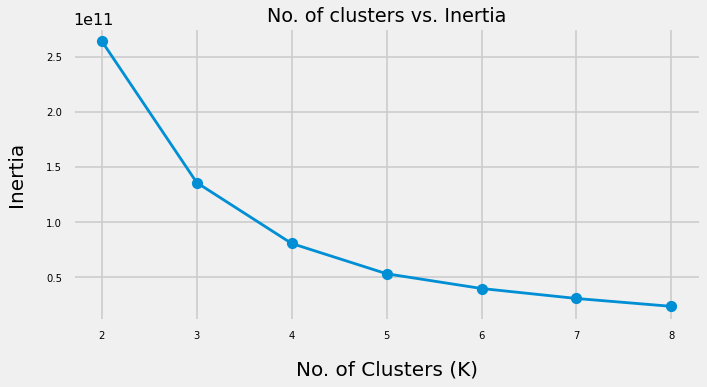

In [37]:
from sklearn.cluster import KMeans

options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(10,5))
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20)

In [39]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds= model.predict(X)

customers_kmeans = X.copy()
customers_kmeans['clusters'] = preds

In [40]:
customers_kmeans

Income  Age  Month_customer  Children  clusters
0     58138.0   58            33.0         0         0
1     46344.0   61             5.0         2         3
2     71613.0   50            17.0         0         2
3     26646.0   31             3.0         1         1
4     58293.0   34            12.0         1         0
...       ...  ...             ...       ...       ...
2235  61223.0   48            19.0         1         0
2236  64014.0   69             3.0         3         0
2237  56981.0   34            12.0         0         0
2238  69245.0   59            12.0         1         0
2239  52869.0   61            27.0         2         0

[2205 rows x 5 columns]

Text(0, 0.5, 'Income')

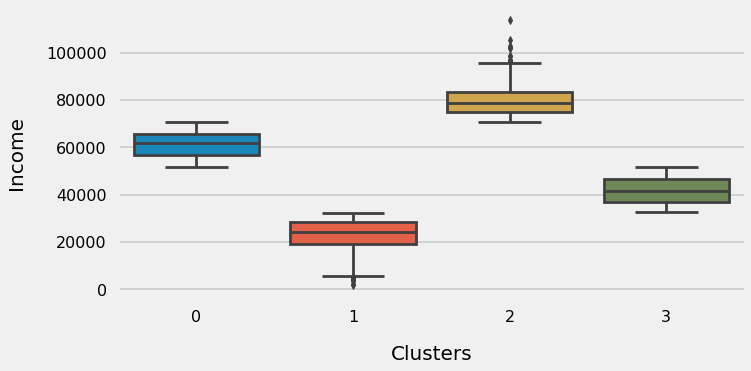

In [41]:
plt.figure(figsize=(10,5))

sns.boxplot(data= customers_kmeans, x='clusters', y = 'Income')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20)

In [44]:
plt.figure(figsize=(10,5))

sns.boxplot(data= customers_kmeans, x='clusters', y = 'TotalSpendings')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)

ValueError: Could not interpret input 'TotalSpendings'

<Figure size 720x360 with 0 Axes>

Text(0, 0.5, 'Month Since Customer')

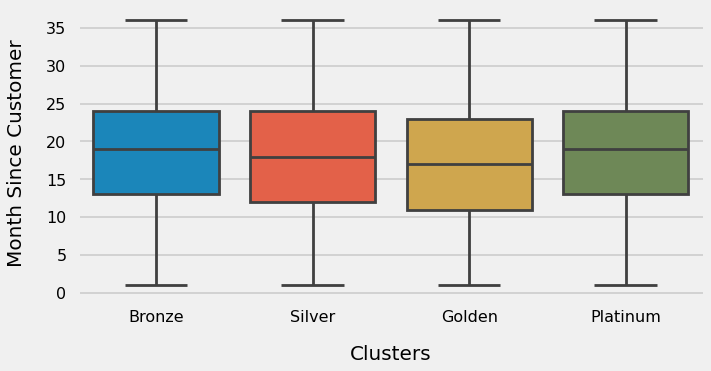

In [55]:
plt.figure(figsize=(10,5))

sns.boxplot(data= customers_kmeans, x='clusters', y = 'Month_customer')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=20, labelpad=20)

Text(0, 0.5, 'Age')

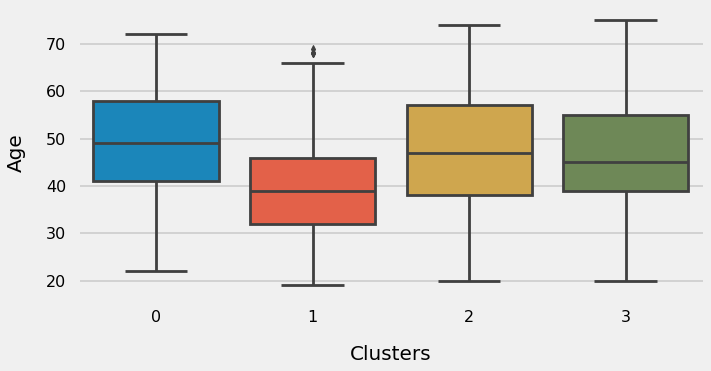

In [46]:
plt.figure(figsize=(10,5))

sns.boxplot(data= customers_kmeans, x='clusters', y = 'Age')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20)

Text(0, 0.5, 'no. of Children')

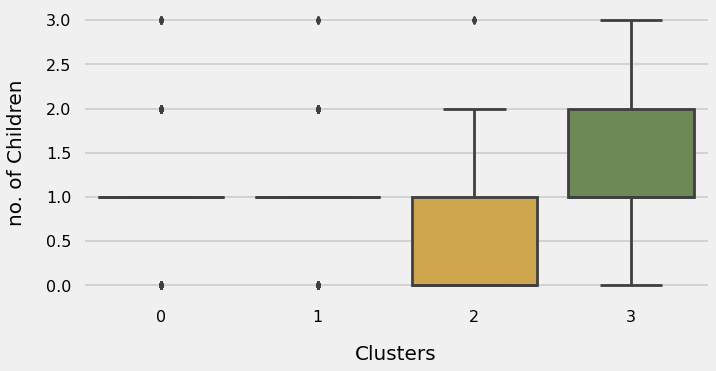

In [47]:
plt.figure(figsize=(10,5))

sns.boxplot(data= customers_kmeans, x='clusters', y = 'Children')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('no. of Children', fontsize=20, labelpad=20)

In [48]:
#DATA EXPLORATION: CLUSTERS BASED
customers_kmeans.clusters = customers_kmeans.clusters.replace({1: 'Platinum', 2: 'Golden', 3: 'Silver', 0: 'Bronze'})
customer['clusters'] = customers_kmeans.clusters

In [49]:
cluster_counts = customer.clusters.value_counts()

fig = px.pie(cluster_counts, values= cluster_counts.values, names= cluster_counts.index, 
             color_discrete_sequence= px.colors.sequential.RdBu)
fig.update_traces(textposition= 'inside', textinfo= 'percent+label', marker = dict(line = dict(color = 'white', width=2)))
fig.show()

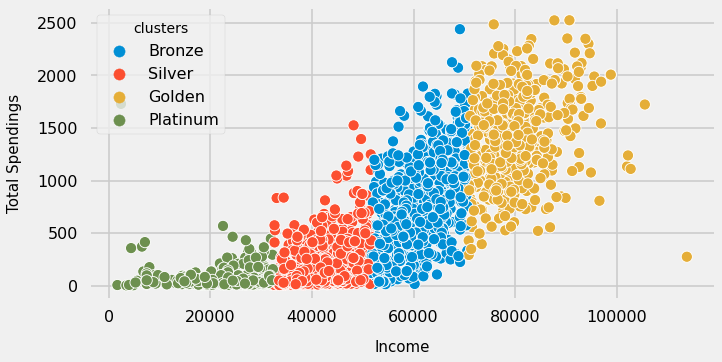

In [50]:
#RELATIONSHIP INCOME X SPENDINGS 
plt.figure(figsize=(10,5))
sns.scatterplot(data= customer, x= customer.Income, y= customer.TotalSpendings, hue='clusters')

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=15, labelpad=15)
plt.ylabel('Total Spendings', fontsize=15, labelpad=15);

<Figure size 1080x720 with 0 Axes>

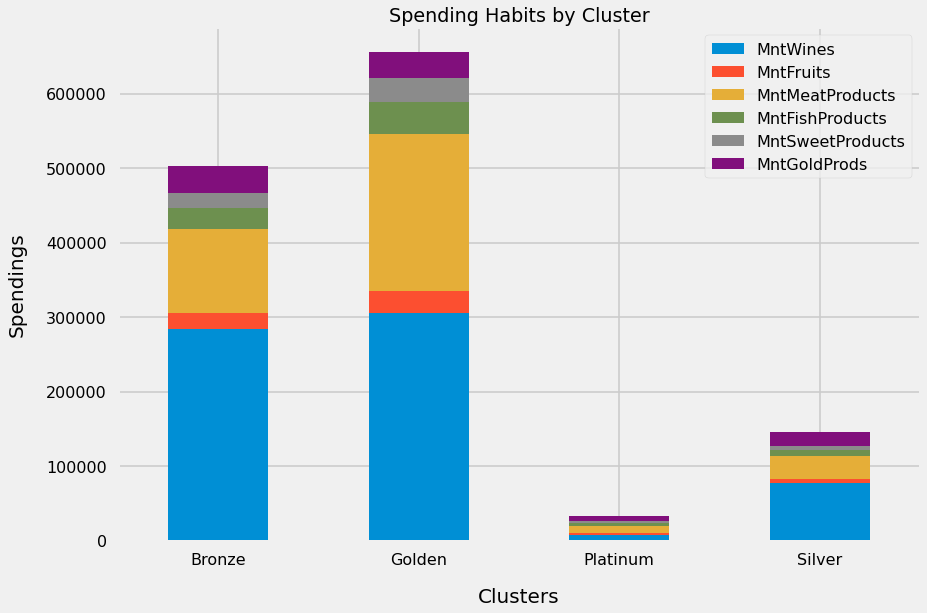

In [51]:
#SPENDING HABITS BY CLUSTERS 
cluster_spendings = customer.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(15,10))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<Figure size 1080x720 with 0 Axes>

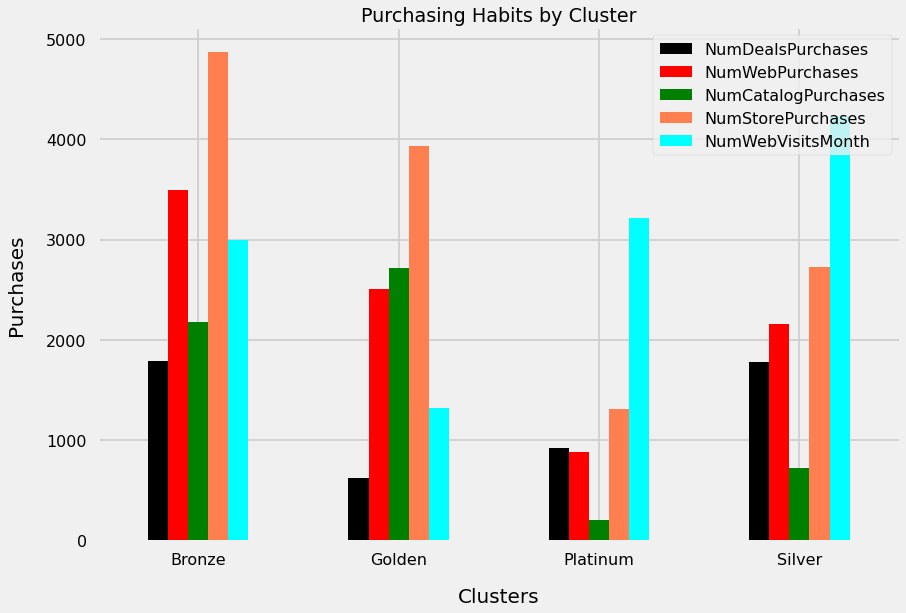

In [52]:
#PURCHASING HABITS BY CLUSTERS
cluster_purchases = customer.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(15,10))
cluster_purchases.plot(kind='bar', color=['black', 'red', 'green', 'coral', 'cyan'])

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<Figure size 1080x720 with 0 Axes>

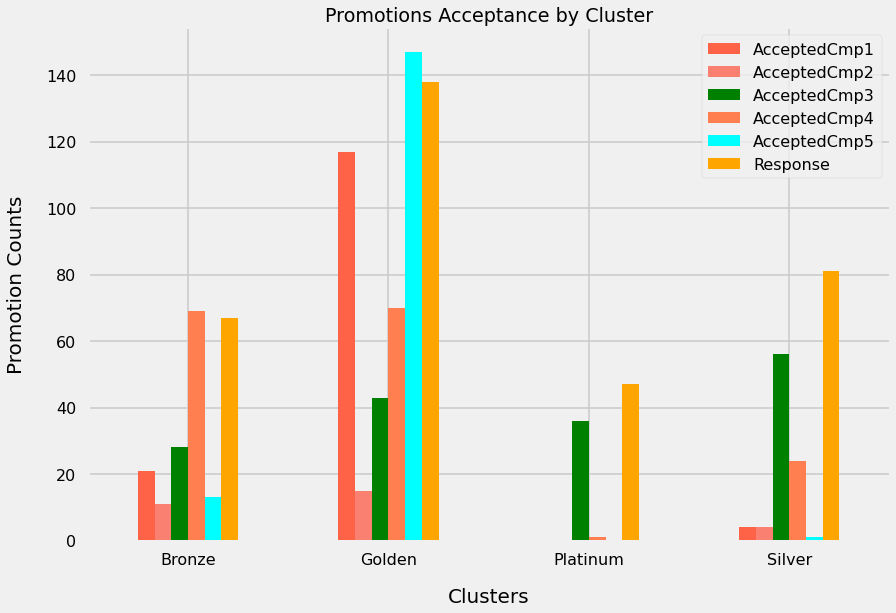

In [53]:
#PROMOTIONS ACCEPTANCE BY CLUSTERS
cluster_campaign = customer.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                                 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(15,10))
cluster_campaign.plot(kind='bar', color=['tomato', 'salmon', 'green', 'coral', 'cyan', 'orange'])

plt.title('Promotions Acceptance by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');